In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.set_option('display.max_rows', 500)
warnings.filterwarnings("ignore")

In [2]:
epi_data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v2/epidemiology.csv", 
                       keep_default_na=False, na_values=[""], parse_dates=['date'], index_col=['date'])

In [3]:
gr_data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v2/oxford-government-response.csv",
                      keep_default_na=False, na_values=[""], parse_dates=['date'], index_col=['date'])

In [4]:
start_remove = ('2019-12-30')
end_remove = ('2019-12-31')
epi_data = epi_data.loc[(epi_data.index < start_remove) | (epi_data.index > end_remove)]

af_epi_df = epi_data[(epi_data.key) == 'AF']
dz_epi_df = epi_data[(epi_data.key) == 'DZ']
kz_epi_df = epi_data[(epi_data.key) == 'KZ']
by_epi_df = epi_data[(epi_data.key) == 'BY']
it_epi_df = epi_data[(epi_data.key) == 'IT']

In [5]:
bg_epi_df = epi_data[(epi_data.key) == 'BG']
hu_epi_df = epi_data[(epi_data.key) == 'HU']
si_epi_df = epi_data[(epi_data.key) == 'SI']
it_epi_df = epi_data[(epi_data.key) == 'IT']
fi_epi_df = epi_data[(epi_data.key) == 'FI']
gb_nir_epi_df = epi_data[(epi_data.key) == 'GB_NIR']

In [6]:
bg_gr_df = gr_data[(gr_data.key) == 'BG']
hu_gr_df = gr_data[(gr_data.key) == 'HU']
si_gr_df = gr_data[(gr_data.key) == 'SI']
it_gr_df = gr_data[(gr_data.key) == 'IT']
fi_gr_df = gr_data[(gr_data.key) == 'FI']
gb_nir_gr_df = gr_data[(gr_data.key) == 'GB_NIR']

In [7]:
bg_epi_df['rolling_cases'] = bg_epi_df['new_confirmed'].rolling(7).mean()
hu_epi_df['rolling_cases'] = hu_epi_df['new_confirmed'].rolling(7).mean()
si_epi_df['rolling_cases'] = si_epi_df['new_confirmed'].rolling(7).mean()
it_epi_df['rolling_cases'] = it_epi_df['new_confirmed'].rolling(7).mean()
fi_epi_df['rolling_cases'] = fi_epi_df['new_confirmed'].rolling(7).mean()
gb_nir_epi_df['rolling_cases'] = gb_nir_epi_df['new_confirmed'].rolling(7).mean()
si_epi_df['rolling_cases'] = si_epi_df['new_confirmed'].rolling(7).mean()

<ipython-input-7-5ebeb713a6a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bg_epi_df['rolling_cases'] = bg_epi_df['new_confirmed'].rolling(7).mean()
<ipython-input-7-5ebeb713a6a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hu_epi_df['rolling_cases'] = hu_epi_df['new_confirmed'].rolling(7).mean()
<ipython-input-7-5ebeb713a6a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [8]:
def plot_epi(epi_data_1,epi_data_2,epi_data_3,epi_data_4,epi_data_5,epi_data_6, country):
    fig = plt.figure(1, figsize=(15, 7))
    ax = fig.add_subplot(111)
    ax.set(xlabel='Month',
           ylabel='New Daily Cases',
           title=country)

    ax.plot(epi_data_1.index.values,
            epi_data_1['rolling_cases'],
            color='olive',
            label='Bulgaria')
    
    ax2 = ax.twinx()
    ax2.plot(epi_data_2.index.values,
            epi_data_2['rolling_cases'],
            color='pink',
            label='Hungary')
    ax2.set_yticks([]) 
    
    ax3 = ax.twinx()
    ax3.plot(epi_data_3.index.values,
            epi_data_3['rolling_cases'],
            color='khaki',
            label='Slovenia')
    ax3.set_yticks([]) 
    
    ax4 = ax.twinx()
    ax4.plot(epi_data_4.index.values,
            epi_data_4['rolling_cases'],
            color='red',
            label='Italy')
    ax4.set_yticks([]) 
    
    ax5 = ax.twinx()
    ax5.plot(epi_data_5.index.values,
            epi_data_5['rolling_cases'],
            color='lightblue',
            label='Finland')
    ax5.set_yticks([]) 
    
    ax6 = ax.twinx()
    ax6.plot(epi_data_6.index.values,
            epi_data_6['rolling_cases'],
            color='gold',
            label='Ireland')
    ax6.set_yticks([]) 

   
    
    handles,labels = [],[]
    for ax in fig.axes:
        for h,l in zip(*ax.get_legend_handles_labels()):
            handles.append(h)
            labels.append(l)

    ax.set_xlim([dt.date(2020, 1, 1), dt.date(2020, 12, 1)])
    plt.legend(handles,labels)
    plt.show()

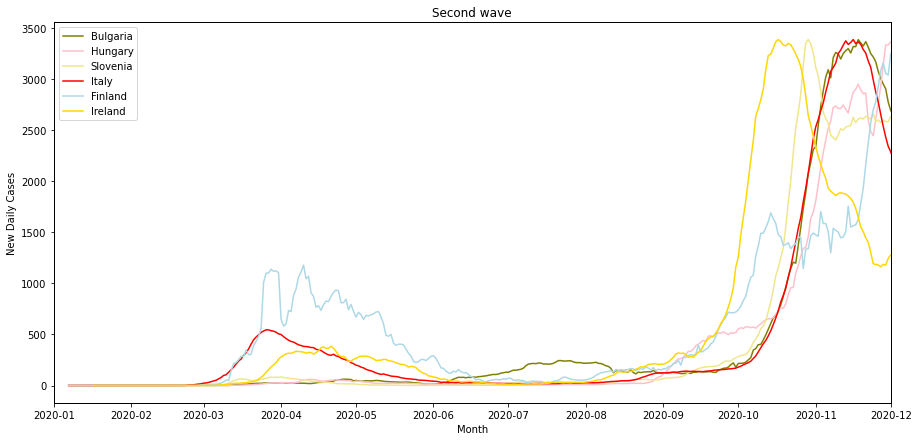

In [9]:
plot_epi(bg_epi_df,hu_epi_df,si_epi_df,it_epi_df,fi_epi_df,gb_nir_epi_df,'Second wave')

In [10]:

def spike_plot_containment_policies(epi_data, gr_data, country):
    fig = plt.figure(1, figsize=(15, 7))
    ax = fig.add_subplot(111)
    ax.set(xlabel='Month',
           ylabel='New Daily Cases',
           title=country + ' Containment Policies vs Cases')

    ax.plot(epi_data.index.values,
            epi_data['rolling_cases'],
            color='blue',
            label='New Daily Cases (7-day avg)')

    ax2 = ax.twinx()
    ax2.plot(gr_data.index.values,
            gr_data['stay_at_home_requirements'].diff(),
            color='red',
            label='Stay at Home [0-3]]')

    ax2.plot(gr_data.index.values,
            gr_data['workplace_closing'].diff(),
            color='orange',
            label='Workplace Closing [0-3]')

    ax2.plot(gr_data.index.values,
            gr_data['school_closing'].diff(),
            color='purple',
            label='School Closing [0-3]')

    
    ax2.plot(gr_data.index.values,
            gr_data['restrictions_on_gatherings'].diff(),
            color='lightblue',
            label='Gather Restrictions [0-4]')
    handles,labels = [],[]
    for ax in fig.axes:
        for h,l in zip(*ax.get_legend_handles_labels()):
            handles.append(h)
            labels.append(l)

    ax.set_xlim([dt.date(2020, 1, 1), dt.date(2020, 12, 1)])
    plt.legend(handles,labels)
    plt.show()
    

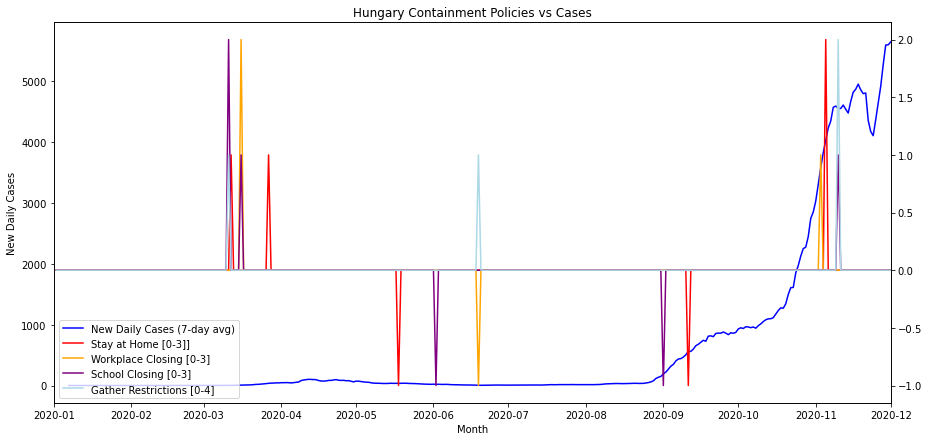

In [11]:
spike_plot_containment_policies(hu_epi_df, hu_gr_df, 'Hungary')

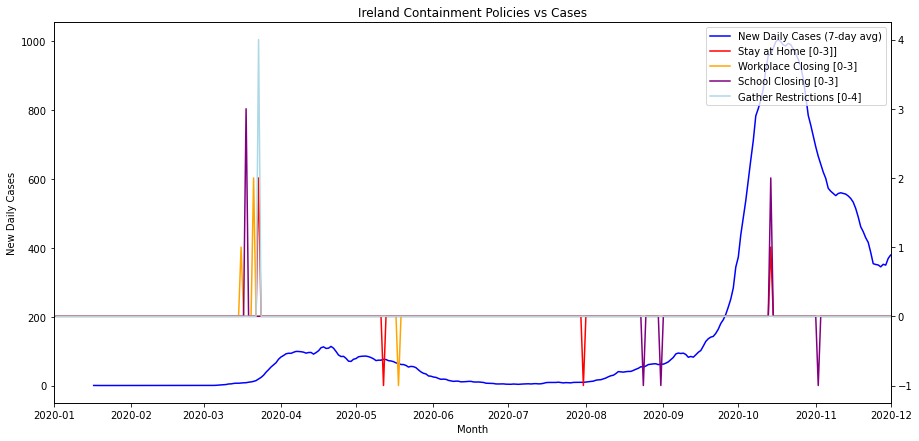

In [12]:
spike_plot_containment_policies(gb_nir_epi_df, gb_nir_gr_df, 'Ireland')